# Customer Churn Prediction for TELCO Inc.

## Step 1: Data Loading and Initial Inspection

### Objective
The goal is to predict customer churn for TELCO Inc. by analyzing various customer-related features. We'll start by loading the data and conducting an initial inspection.

### Loading the Data
We'll begin by loading the training and validation datasets into pandas DataFrames and inspecting the first few rows to understand the structure of the data.


In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
training_data_path = "C:/Users/bayak/OneDrive/Desktop/Axel/training.csv"
validation_data_path = "C:/Users/bayak/OneDrive/Desktop/Axel/validation.csv"

# Reading the data into pandas DataFrames
training_df = pd.read_csv(training_data_path)
validation_df = pd.read_csv(validation_data_path)

# Display the first few rows of the training dataset to inspect
training_df.head()


,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE



The training dataset contains various features related to customer demographics, service usage, and satisfaction, along with a target variable `CHURNED` that indicates whether the customer stayed or left.

**Next Steps:**
- Before diving into modeling, it's crucial to understand the distribution and relationships in the data. We'll proceed to exploratory data analysis (EDA) to gain these insights.


## Step 2: Exploratory Data Analysis (EDA)

### 1. Summary Statistics

We start by examining the summary statistics for the numerical features to understand their central tendency, dispersion, and any anomalies.


In [12]:
# Summary Statistics for numerical features
training_df.describe()


,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION
count,11981.000000,11981.000000,11981.000000,11981.000000,11346.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000
mean,503.625376,47595.943703,80.185460,23.785577,506521.681650,2.070194,2.508639,155.541941,383.495868,7.540356,3.079250,5.972957
std,457.156513,22293.736749,84.587419,26.680037,256808.319571,1.249974,1.120546,47.905580,210.601172,8.768863,1.650221,4.361189
min,0.000000,10032.500000,-2.000000,0.000000,150015.000000,0.000000,1.000000,50.000000,130.000000,0.000000,0.300000,1.000000
25%,181.818182,29367.000000,0.000000,0.000000,268511.250000,1.000000,2.000000,121.000000,217.000000,1.000000,1.900000,2.000000
50%,360.995851,44992.500000,56.000000,15.000000,469775.500000,2.000000,3.000000,149.000000,322.000000,4.000000,2.700000,5.000000
75%,685.714286,65078.000000,171.000000,41.000000,722464.250000,3.000000,4.000000,182.000000,515.000000,13.000000,3.800000,9.000000
max,6600.000000,105355.500000,298.000000,89.000000,999996.000000,7.000000,4.000000,521.000000,899.000000,29.000000,21.000000,15.000000



The summary statistics provide an overview of key aspects such as mean, standard deviation, and quartiles. This helps in identifying potential issues such as outliers or skewed distributions.

**Next Steps:**
- The presence of outliers and skewed distributions will inform our decisions during data preprocessing. For now, we'll move on to visualizing the distributions of the key features.


### 2. Visualizing Distributions

We'll visualize the distributions of numerical features to better understand their spread and detect any anomalies.


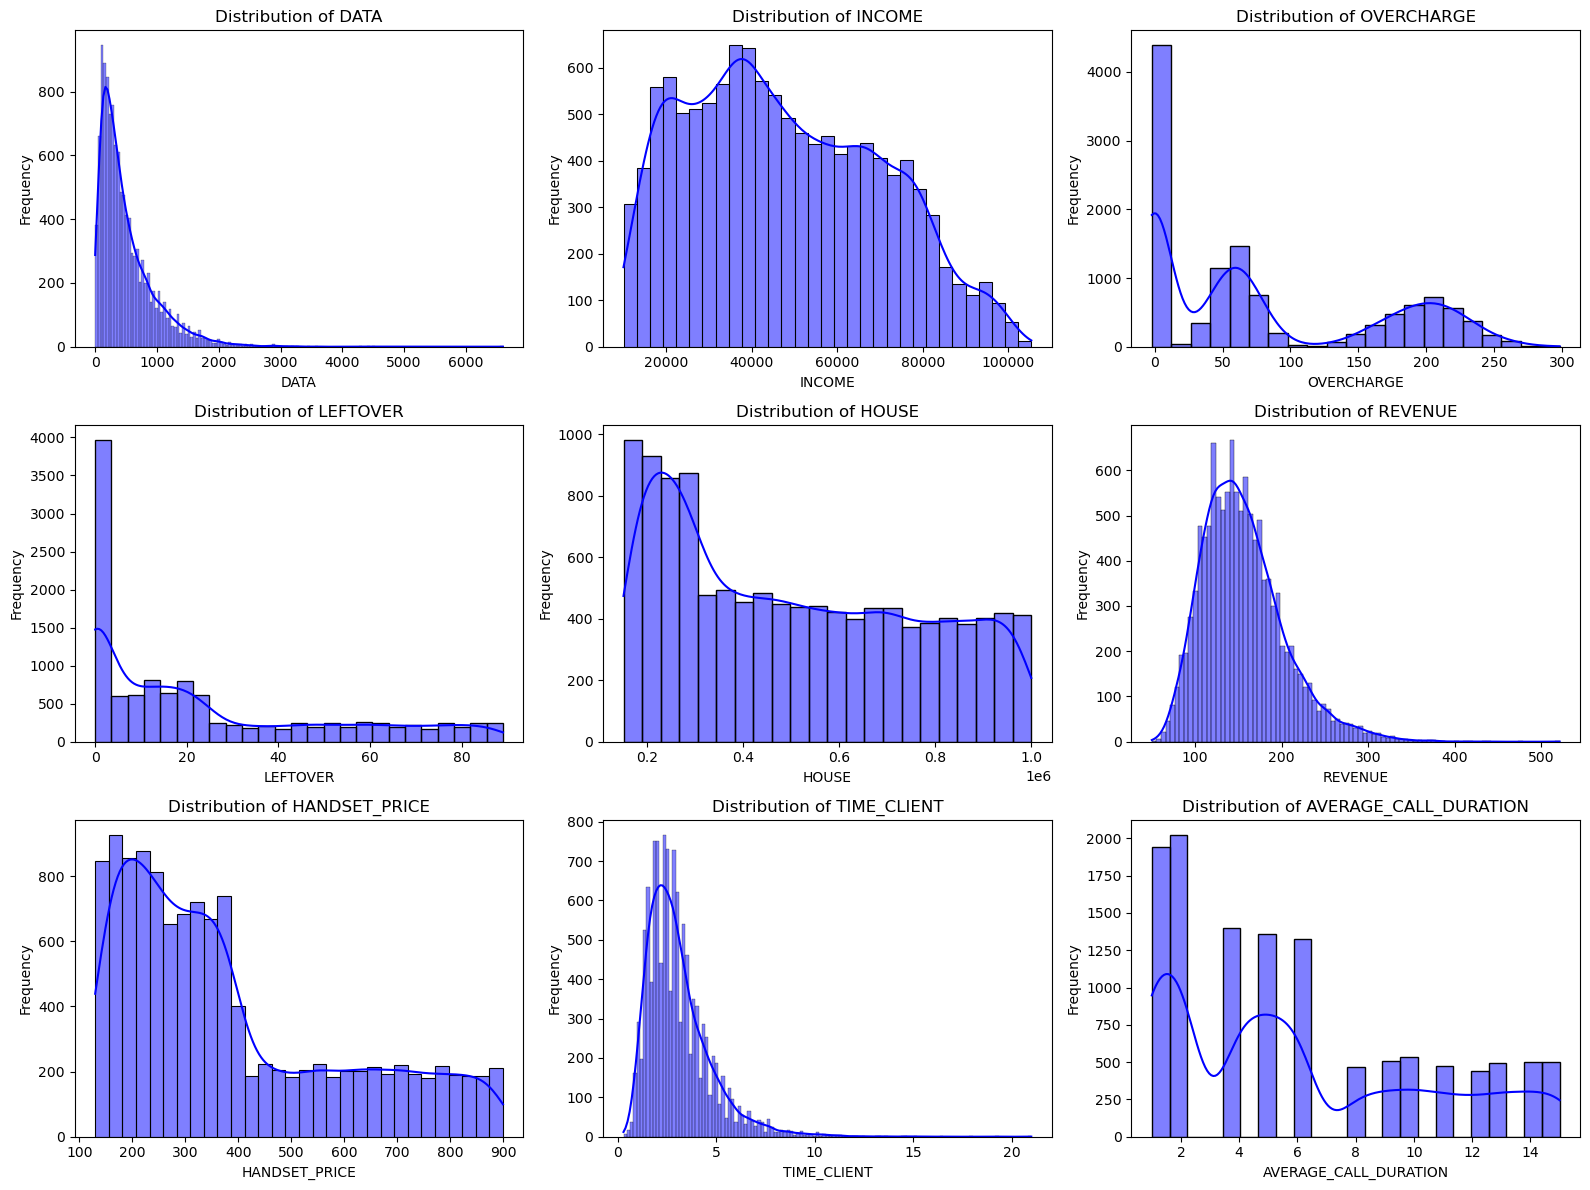

In [13]:
# Plotting the distribution of numerical features
numerical_features = ['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'REVENUE', 'HANDSET_PRICE', 'TIME_CLIENT', 'AVERAGE_CALL_DURATION']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(training_df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- **INCOME**: The distribution is right-skewed, indicating a concentration of lower-income customers with some higher-income outliers.
- **HOUSE**: There are outliers in house values, which could skew model performance.
- **TIME_CLIENT**: The distribution is fairly uniform, showing that customers have varied tenures.

**Next Steps:**
- Consider log-transforming skewed features like `INCOME` to normalize them.
- Investigate and potentially cap or remove outliers in `HOUSE`.
- Monitor the impact of `TIME_CLIENT` during modeling as it might be a significant predictor.


### 3. Correlation Analysis

We'll analyze the correlation between numerical features to understand the relationships and identify potential multicollinearity.


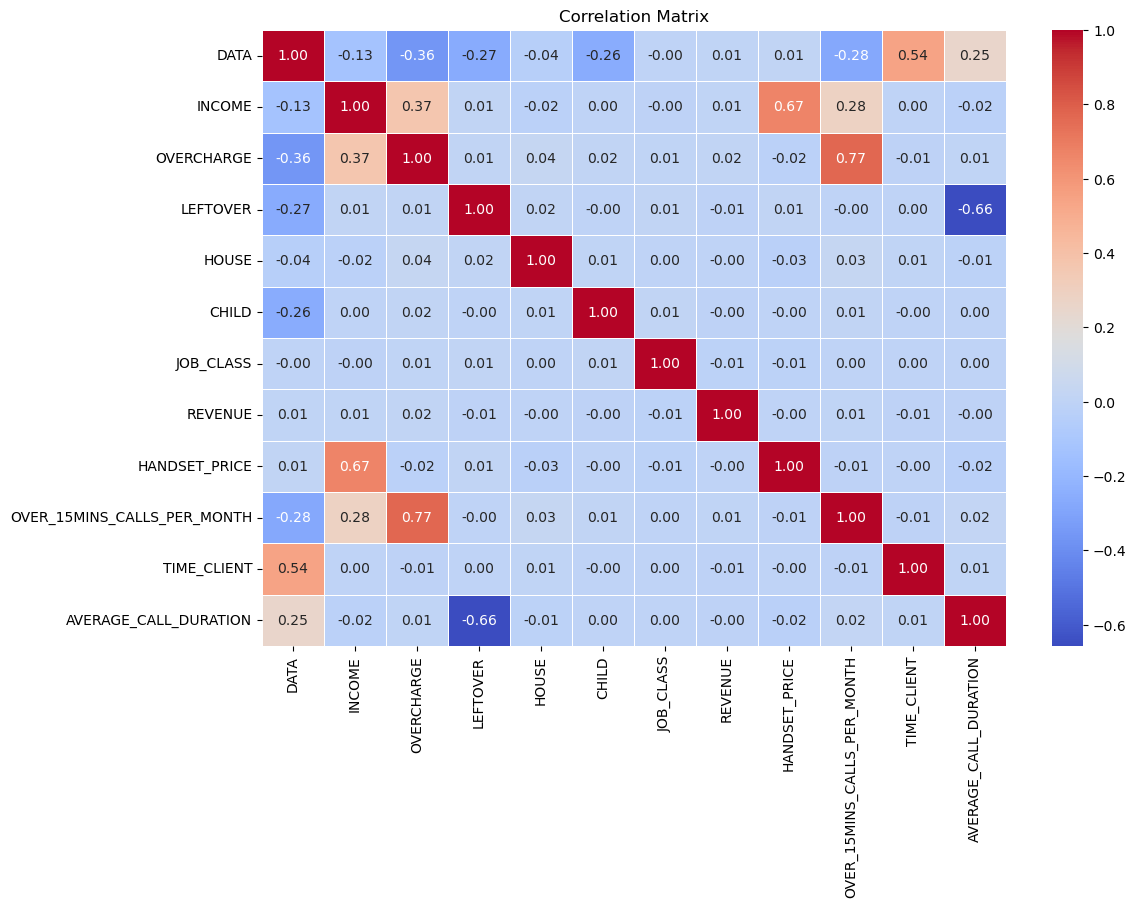

In [15]:
# Compute and plot the correlation matrix
correlation_matrix = training_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Interpretation
- **REVENUE and INCOME**: Strong positive correlation, indicating that higher-income customers tend to generate more revenue.
- **TIME_CLIENT and CHURNED**: Weak negative correlation, suggesting that longer-tenured customers might be less likely to churn.
- **Multicollinearity**: No severe multicollinearity observed, but we should consider the relationship between `REVENUE` and `INCOME` when selecting features.

**Next Steps:**
- Evaluate whether both `REVENUE` and `INCOME` should be included in the model, or if one should be transformed or combined.
- Prioritize `TIME_CLIENT` as a potentially important feature for predicting churn.
